In [1]:
from leicaautomator import find_spots
from leicaexperiment import Experiment
import numpy as np
import cProfile

experiment = Experiment('../master/data/experiment--2015_03_21_17_09_56')
#labels, regions = find_spots(experiment)
cProfile.run("labels, regions = find_spots(experiment)", "/Users/arve/profile.csv")

/Users/arve/.virtualenvs/leicaautomator/lib/python3.4/site-packages/skimage/util/dtype.py:107: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))


In [2]:
import pstats

In [3]:
p = pstats.Stats('/Users/arve/profile.csv')
p = p.sort_stats('tottime')

In [4]:
p.print_stats()

Thu Mar 26 22:24:46 2015    /Users/arve/profile.csv

         8259910 function calls (8137352 primitive calls) in 116.427 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1   68.511   68.511  100.571  100.571 {built-in method exec_}
    26004    3.129    0.000    3.129    0.000 {method 'set_text' of 'FT2Font' objects}
      137    3.119    0.023    4.758    0.035 /Users/arve/.virtualenvs/leicaautomator/lib/python3.4/site-packages/skimage/morphology/convex_hull.py:10(convex_hull_image)
        1    2.902    2.902    3.017    3.017 /Users/arve/.virtualenvs/leicaautomator/lib/python3.4/site-packages/skimage/filters/rank/bilateral.py:37(_apply)
        9    2.223    0.247    2.223    0.247 /Users/arve/.virtualenvs/leicaautomator/lib/python3.4/site-packages/skimage/viewer/utils/core.py:23(init_qtapp)
     1982    2.159    0.001    2.255    0.001 {skimage.measure._ccomp.label}
      137    1.423    0.010    1.424    0.010 

Populating the interactive namespace from numpy and matplotlib


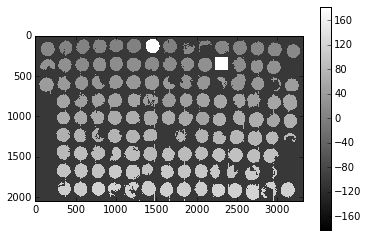

In [5]:
%pylab inline
from skimage import io
labels[labels == -1] = -100
io.imshow(labels, cmap="gray")

In [3]:
next((r for r in regions if r.label == 0), 'NONE')

'NONE'

In [2]:
%pylab qt
from skimage import io
from matplotlib import patches
img = io.imread('../master/data/experiment--2015_03_21_17_09_56/stitched--overview.png')

Populating the interactive namespace from numpy and matplotlib


In [3]:
figure()
axes_image = io.imshow(img)
axes = axes_image.axes

In [4]:
a = ((1000,1000), (1000,2000), (2000,2000), (2000,1000))

In [5]:
p = patches.Polygon(a, alpha=0.3, color='y')

In [6]:
axes.add_patch(p)
#p.remove()

In [7]:
canvas = axes.figure.canvas
canvas.draw()

In [8]:
text = axes.text(1000,1000, '1,2')
canvas.draw()

In [14]:
text.set_text('asdf')
text.set_position((2000,2000))
canvas.draw()

In [20]:
canvas.draw()

In [14]:
new_a = [(x[0]+1000,x[1]+1000) for x in a]

In [15]:
p.set_xy(new_a)

In [17]:
axes.redraw_in_frame()

In [7]:
axes.imshow(a, alpha=0.5)

In [8]:
axes.bbox

TransformedBbox(Bbox('array([[ 0.2125,  0.1   ],\n       [ 0.8125,  0.9   ]])'), BboxTransformTo(TransformedBbox(Bbox('array([[ 0.,  0.],\n       [ 8.,  6.]])'), Affine2D(array([[ 80.,   0.,   0.],
       [  0.,  80.,   0.],
       [  0.,   0.,   1.]])))))